# Lecture 4: Assignment <br>
Rob Eishico Rentuza <br>
BSCS - 1

## Kruskal's Algorithm
### Solution:

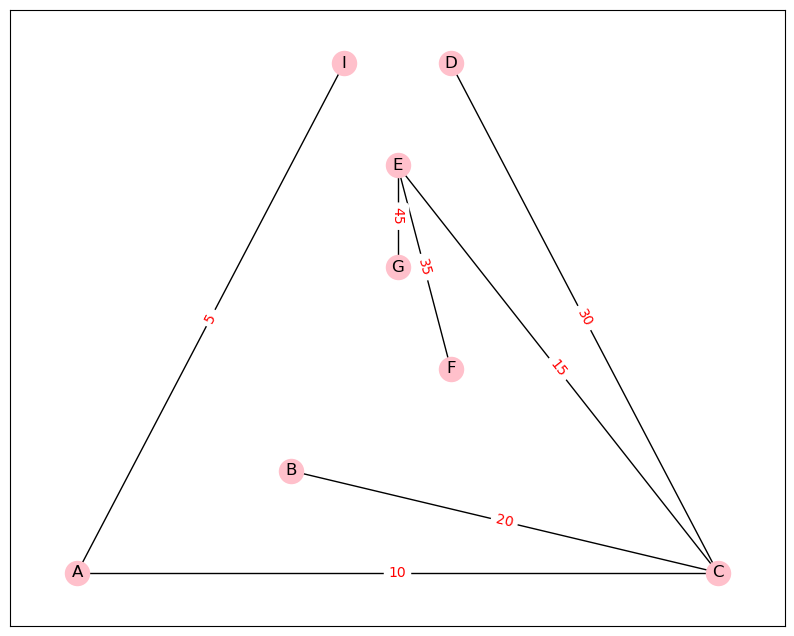

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])

# Add edges with weights
edgelist = [
    ("A", "C", {"weight": 10}),
    ("A", "I", {"weight": 5}),
    ("C", "B", {"weight": 20}),
    ("C", "E", {"weight": 15}),
    ("C", "D", {"weight": 30}),
    ("B", "E", {"weight": 25}),
    ("I", "E", {"weight": 40}),
    ("E", "F", {"weight": 35}),
    ("F", "G", {"weight": 50}),
    ("G", "E", {"weight": 45}),
]

G.add_edges_from(edgelist)

# Compute the minimum spanning tree using Kruskal's algorithm
mst = nx.minimum_spanning_tree(G)

# Plotting
plt.figure(figsize=(10, 8))

# Layout
pos = nx.planar_layout(G)

# Draw the MST edges
nx.draw_networkx_edges(G, pos, edgelist=mst.edges(), edge_color='black')

# Draw the original graph nodes
nx.draw_networkx_nodes(G, pos, node_color='pink')

# Draw edge labels for edges present in MST
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True) if (u, v) in mst.edges()},
    font_color='red'
)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.show()


<hr>

## Prim's Algorithm
### Solution:

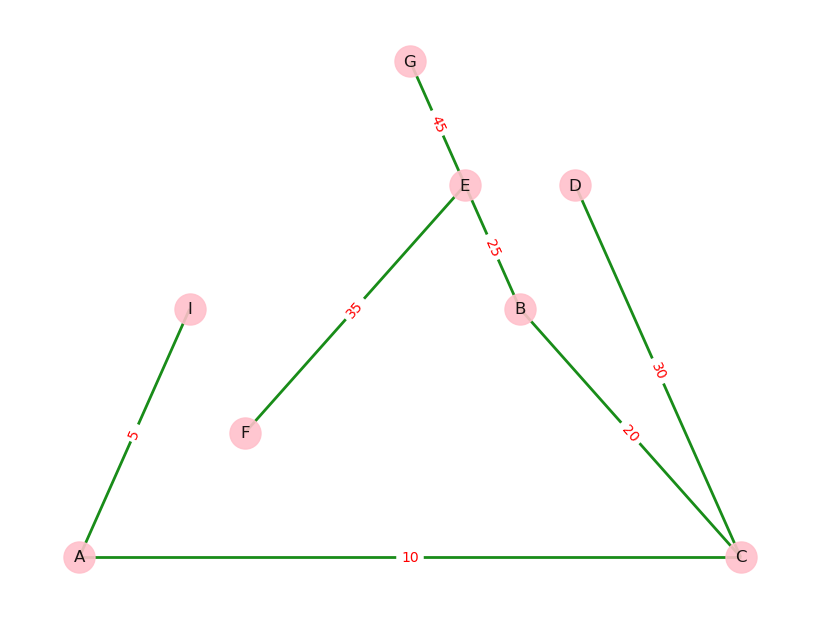

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def prim_mst(graph, start):
    mst = []
    visited = set([start])
    edges = [
        (weight, start, node)
        for node, weight in graph[start].items()
    ]
    heapq.heapify(edges)

    while edges:
        weight, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst.append((frm, to, weight))
            for next_node, next_weight in graph[to].items():
                if next_node not in visited:
                    heapq.heappush(edges, (next_weight, to, next_node))

    return mst

# Create the graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edge_labels = {("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45}
edgelist = list(edge_labels.keys())  # Extracting edges from edge_labels
G.add_edges_from(edgelist)

# Convert the graph to a dictionary representation for easier processing
graph_dict = nx.to_dict_of_dicts(G)

# Running Prim's algorithm
mst = prim_mst(graph_dict, "A")

# Create a new graph for MST
MST_G = nx.Graph()
for edge in mst:
    MST_G.add_edge(edge[0], edge[1], weight=edge[2])

# Filter edge_labels to only include those in the MST
filtered_edge_labels = {edge: label for edge, label in edge_labels.items() if edge in MST_G.edges}

# Draw the MST with edge labels
plt.figure(figsize=(8, 6))
pos = nx.planar_layout(MST_G)
nx.draw(MST_G, pos, with_labels=True, edge_color='green', width=2, node_size=500, node_color='pink', alpha=0.9)
nx.draw_networkx_edge_labels(
    MST_G, pos,
    edge_labels=filtered_edge_labels,  # Use the filtered edge_labels
    font_color='red'
)

plt.show()


<hr>

## Djitraka's Shortest Path Algorithm
### Solution:

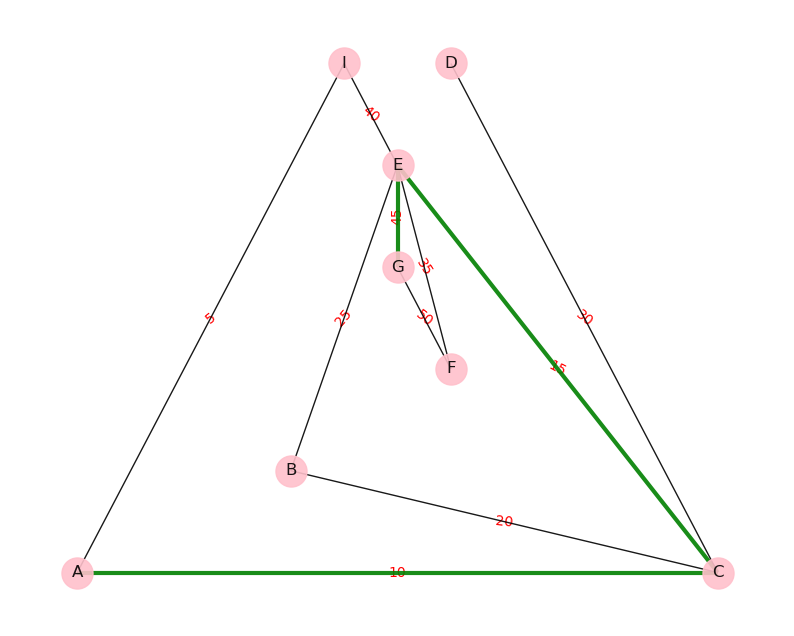

Shortest Path: ['A', 'C', 'E', 'G']


In [20]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Define edge weights
edge_weights = {("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_weights,
    font_color='red'
)

# Use Djikstra's algorithm to find the shortest path from node "A" to node "G"
shortest_path = nx.shortest_path(G, source="A", target="G", weight="weight")

# Highlight the shortest path
edge_widths = [3 if edge in zip(shortest_path, shortest_path[1:]) else 1 for edge in G.edges()]
edge_colors = ['black' if not edge in zip(shortest_path, shortest_path[1:]) else 'green' for edge in G.edges()]
nx.draw(
    G, pos, edge_color=edge_colors, width=edge_widths, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)

plt.show()

print("Shortest Path:", shortest_path)
